In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

#load all the relevant data

vibe_col = [1,2,3,4,5,6]

normfile = "./Online_data/normal/normal/*.csv"
abnormal_6g = "./Online_data/imbalance/6g/*.csv"
abnormal_10g = "./Online_data/imbalance/10g/*.csv"
abnormal_15g = "./Online_data/imbalance/15g/*.csv"
abnormal_20g = "./Online_data/imbalance/20g/*.csv"
abnormal_25g = "./Online_data/imbalance/25g/*.csv"
abnormal_30g = "./Online_data/imbalance/30g/*.csv"
abnormal_35g = "./Online_data/imbalance/35g/*.csv"


def dataReader(path, cols):
    data_n = pd.DataFrame()
    #each column is a vibration signal, each file has 6 signals, make an array of signals
    for file in glob.glob(path):
        df = pd.read_csv(file, usecols=cols)
        for (columnName, columnData) in df.iteritems():
            #make column data into a dataframe
            df1 = pd.DataFrame(columnData)
            #add the dataframe to the data_n dataframe
            data_n = pd.concat([data_n, df1], axis=1)
    return data_n

datanorm = dataReader(normfile, vibe_col)
data6g = dataReader(abnormal_6g, vibe_col)
data10g = dataReader(abnormal_10g, vibe_col)
data15g = dataReader(abnormal_15g, vibe_col)
data20g = dataReader(abnormal_20g, vibe_col)
data25g = dataReader(abnormal_25g, vibe_col)
data30g = dataReader(abnormal_30g, vibe_col)
data35g = dataReader(abnormal_35g, vibe_col)

print(datanorm.shape)
print(data6g.shape)

(249999, 294)
(249999, 294)


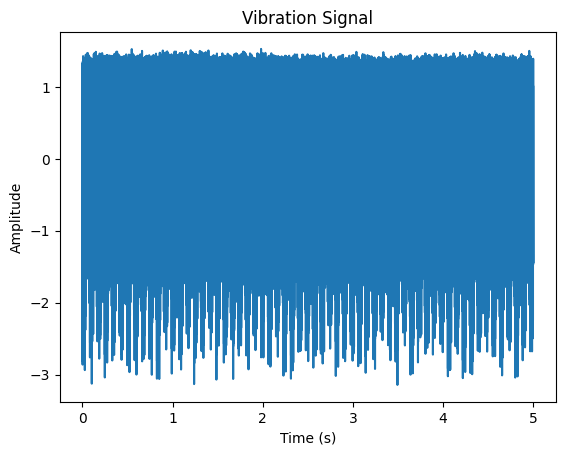

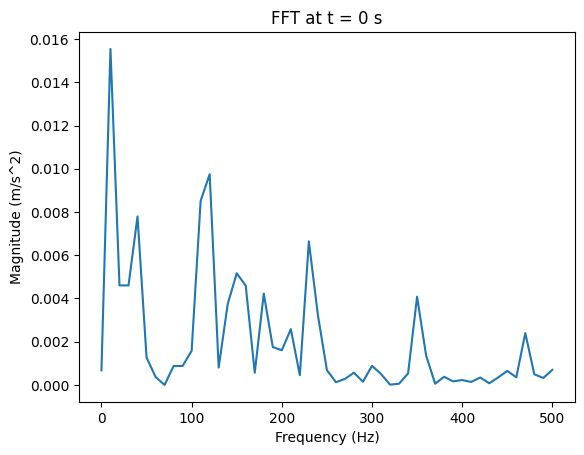

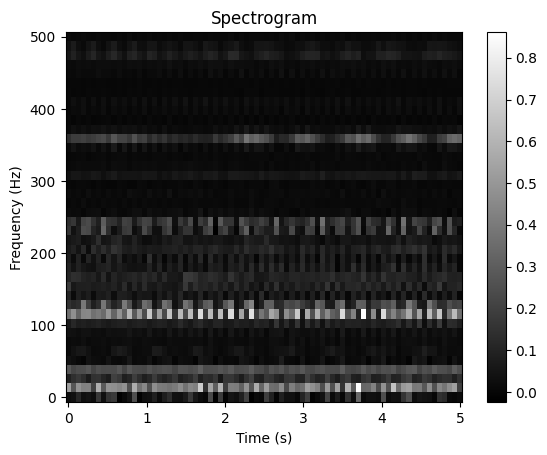

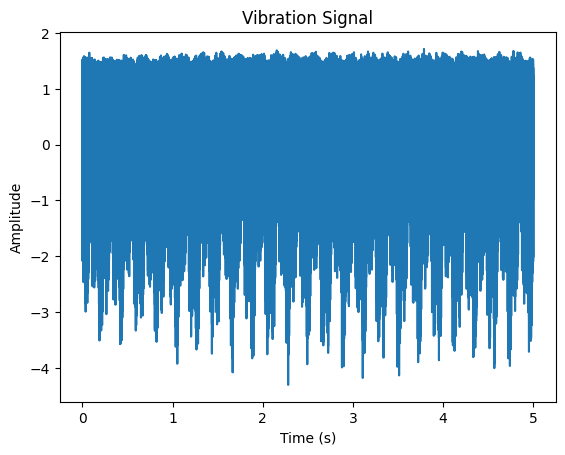

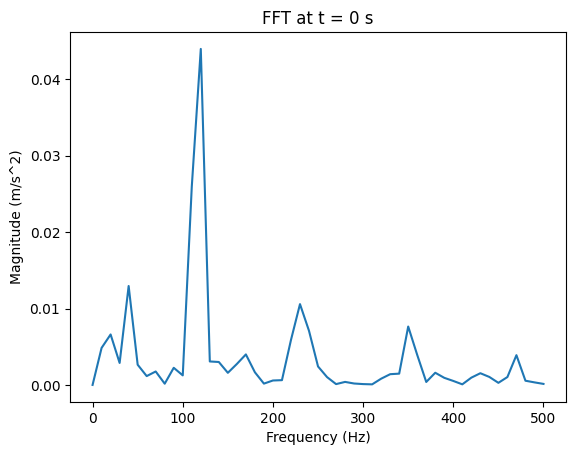

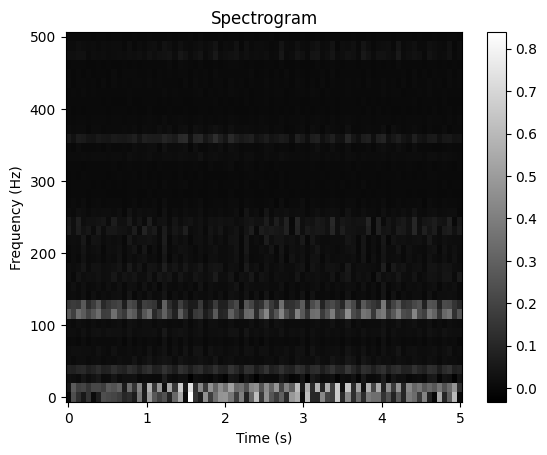

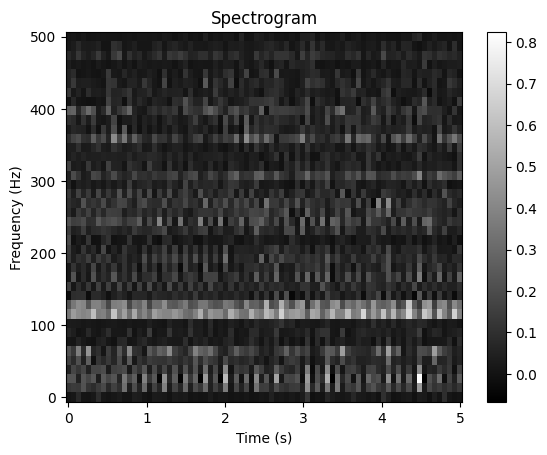

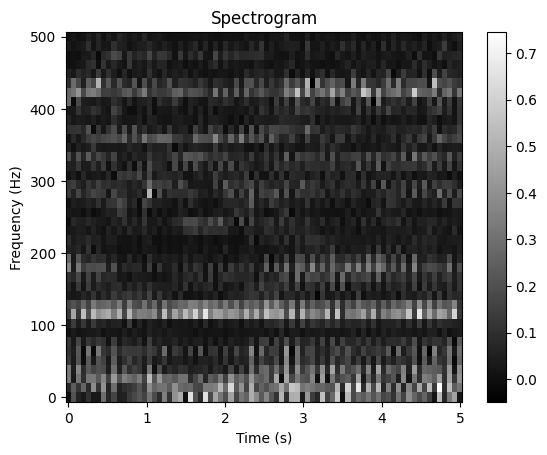

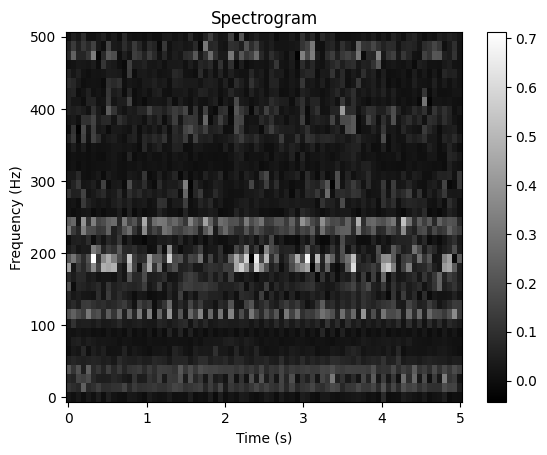

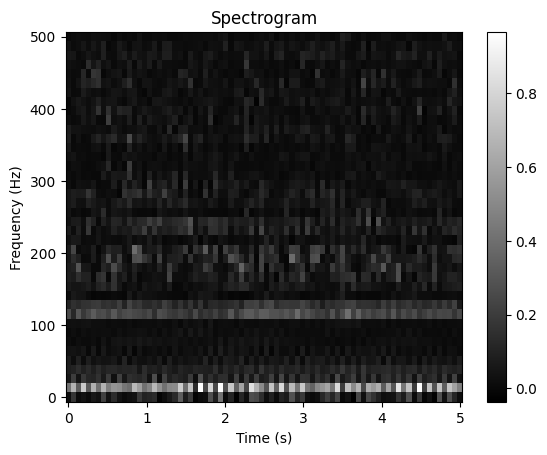

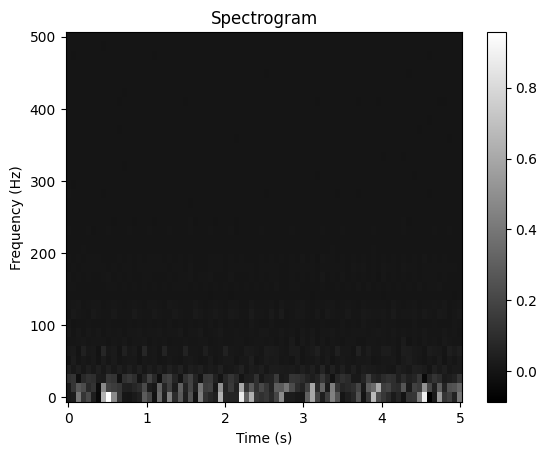

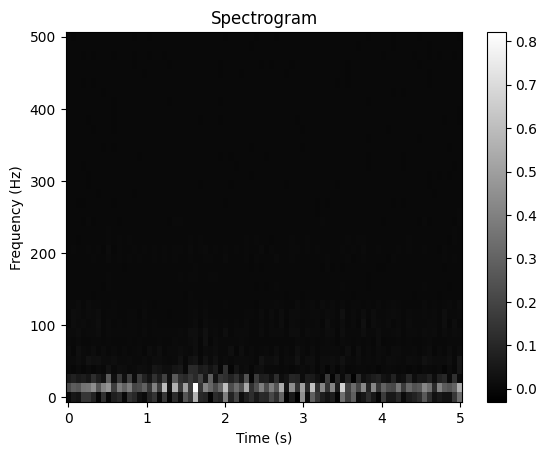

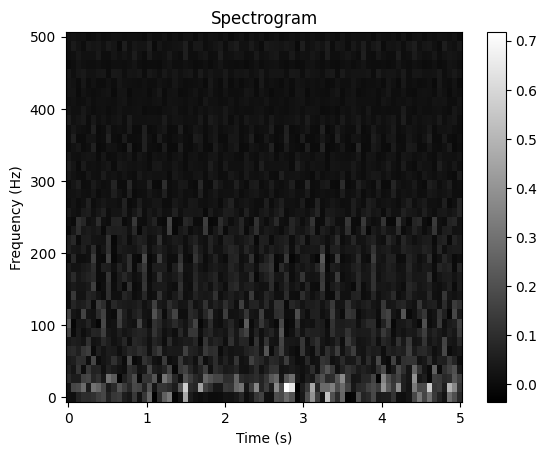

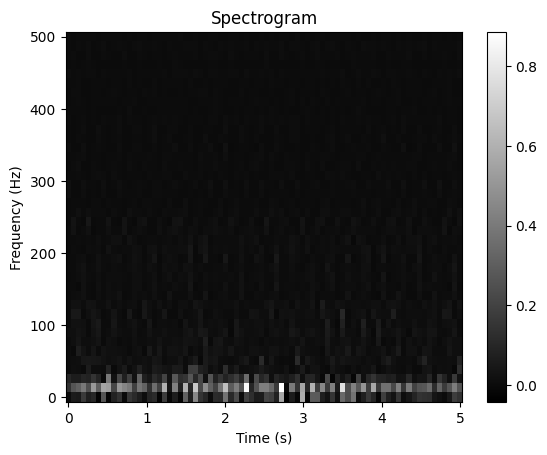

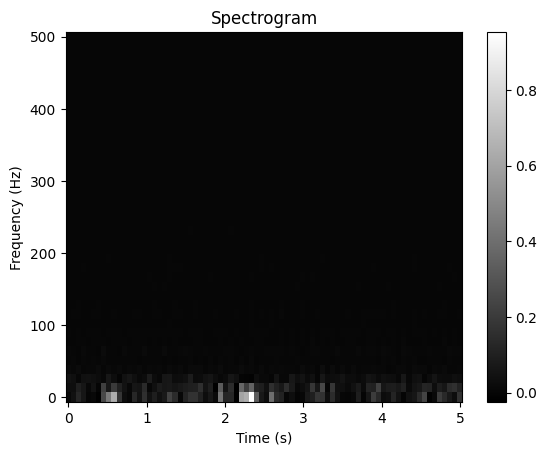

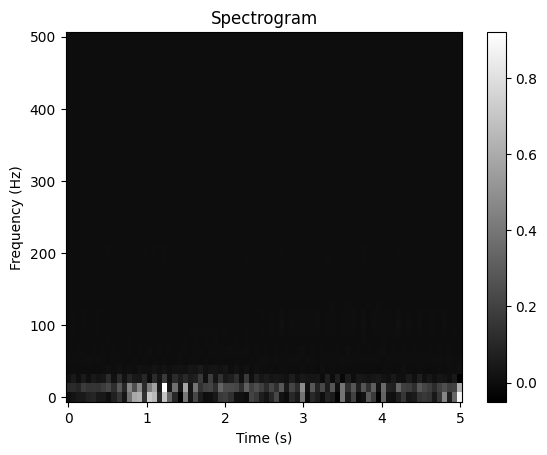

In [84]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import ndimage

# display 0-1000hz frequency range of the FFT and spectrogram using 50khz sampling rate and 5s duration

def downresolution(data, x_factor, y_factor):
    return ndimage.zoom(data, zoom=(y_factor, x_factor))


def plot_signal_and_spectrogram(sig, plotSig = False, plotFFT = False, plotSpec = False):
    fs = 50000
    duration = 5

    t = np.linspace(0, duration, int(fs * duration) - 1)
    
    
    if plotSig:
        plt.plot(t, sig)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('Vibration Signal')
        plt.show()

    nperseg = 5000  # Update nperseg to capture the desired frequency resolution
    noverlap = nperseg / 2
    # window = np.ones(nperseg)  # Replace Hanning window with rectangular window
    window = np.hanning(nperseg)
    # window = np.hamming(nperseg)
    
    f, ts, Sxx = signal.spectrogram(sig, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, detrend=False, scaling="spectrum")

    timeframe_idx = np.argmin(np.abs(ts - 0))
    fft_vals = Sxx[:, timeframe_idx]
    freq_bins = f

    # Update frequency range for FFT plot
    frequency_of_interest = 500
    
    mask = (freq_bins >= 0) & (freq_bins <= frequency_of_interest)
    
    if plotFFT:
        plt.plot(freq_bins[mask], fft_vals[mask])
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude (m/s^2)')
        plt.title('FFT at t = 0 s')
        plt.show()

    # Update frequency range for spectrogram plot
    # print(Sxx.shape)
    freq_range = int(Sxx.shape[0] * frequency_of_interest / (fs/2))
    
    # Normalize the spectrogram data
    Sxx_interest = Sxx[:freq_range, :]
    Sxx_normalized = (Sxx_interest - Sxx_interest.min()) / (Sxx_interest.max() - Sxx_interest.min())

        
    # Downresolution factors
    x_factor = 0.8  # Reduce the time resolution by a factor of 2
    y_factor = 0.8  # Reduce the frequency resolution by a factor of 2

    Sxx_downres = downresolution(Sxx_normalized, x_factor, y_factor)
        
    
    if plotSpec:
        # downressed spectrogram
        plt.pcolormesh(np.linspace(0, duration, Sxx_downres.shape[1]), np.linspace(0, frequency_of_interest, Sxx_downres.shape[0]), Sxx_downres, cmap='gist_gray')
            
        # normalization
        # plt.pcolormesh(np.linspace(0, duration, Sxx_normalized.shape[1]), np.linspace(0, frequency_of_interest, freq_range), np.abs(Sxx_normalized[:freq_range, :]), cmap='gist_gray')
        
        # no normalization
        # plt.pcolormesh(np.linspace(0, duration, Sxx.shape[1]), np.linspace(0, frequency_of_interest, freq_range), np.abs(Sxx[:freq_range, :]), cmap='gist_gray')
        
        plt.colorbar()
        plt.ylabel('Frequency (Hz)')
        plt.xlabel('Time (s)')
        plt.title('Spectrogram')
        plt.show()
    
    return Sxx_downres




# Sample data
# datanorm = pd.DataFrame(np.random.randn(250000, 6))

signal1 = datanorm.iloc[:, 0]
signalfk1 = data15g.iloc[:, 0]

signal2 = datanorm.iloc[:, 1]
signalfk2 = data15g.iloc[:, 1]

signal3 = datanorm.iloc[:, 2]
signalfk3 = data15g.iloc[:, 2]

signal4 = datanorm.iloc[:, 3]
signalfk4 = data15g.iloc[:, 3]

signal5 = datanorm.iloc[:, 4]
signalfk5 = data15g.iloc[:, 4]

signal6 = datanorm.iloc[:, 5]
signalfk6 = data15g.iloc[:, 5]

plot_signal_and_spectrogram(signal1, True, True, True)
plot_signal_and_spectrogram(signalfk1, True, True, True)

plot_signal_and_spectrogram(signal2, False, False, True)
plot_signal_and_spectrogram(signalfk2, False, False, True)

plot_signal_and_spectrogram(signal3, False, False, True)
plot_signal_and_spectrogram(signalfk3, False, False, True)

plot_signal_and_spectrogram(signal4, False, False, True)
plot_signal_and_spectrogram(signalfk4, False, False, True)

plot_signal_and_spectrogram(signal5, False, False, True)
plot_signal_and_spectrogram(signalfk5, False, False, True)

theshape = plot_signal_and_spectrogram(signal6, False, False, True).shape
plot_signal_and_spectrogram(signalfk6, False, False, True)


height = theshape[0]
width = theshape[1]





# # Resize the spectrogram to a 50x50 image
# Sxx = ndimage.zoom(Sxx, zoom=(50/Sxx.shape[0], 50/Sxx.shape[1]))

# # Plot the spectrogram
# plt.pcolormesh(np.linspace(0, duration, Sxx.shape[1]), np.linspace(
#     0, freq_analyse, Sxx.shape[0]), 20*np.log10(np.abs(Sxx)), cmap='jet')
# plt.colorbar()
# plt.ylabel('Frequency (Hz)')
# plt.xlabel('Time (s)')
# plt.title('Spectrogram of Random Signal with Various Frequencies')
# plt.show()


In [100]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import ndimage

# load all the data and 6g data and make a spectrogram of each signal
# Prepare an empty list to store the spectrograms and their labels
spectrogram_data = []

columnToTest = 0

# get signal 2 of each set of 6 signals
for i in range(0, datanorm.shape[1], 6):
    signalnorm = datanorm.iloc[:, i+columnToTest]
    spec_data = plot_signal_and_spectrogram(signalnorm, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 0})

for i in range(0, data6g.shape[1], 6):
    signal6g = data6g.iloc[:, i+columnToTest]
    spec_data = plot_signal_and_spectrogram(signal6g, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 1})
    
for i in range(0, data10g.shape[1], 6):
    signal10g = data10g.iloc[:, i+columnToTest]
    spec_data = plot_signal_and_spectrogram(signal10g, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 1})
    
for i in range(0, data15g.shape[1], 6):
    signal15g = data15g.iloc[:, i+columnToTest]
    spec_data = plot_signal_and_spectrogram(signal15g, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 1})

for i in range(0, data20g.shape[1], 6):
    signal20g = data20g.iloc[:, i+columnToTest]
    spec_data = plot_signal_and_spectrogram(signal20g, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 1})

for i in range(0, data25g.shape[1], 6):
    signal25g = data25g.iloc[:, i+columnToTest]
    spec_data = plot_signal_and_spectrogram(signal25g, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 1})

for i in range(0, data30g.shape[1], 6):
    signal30g = data30g.iloc[:, i+columnToTest]
    spec_data = plot_signal_and_spectrogram(signal30g, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 1})
    
for i in range(0, data35g.shape[1], 6):
    signal35g = data35g.iloc[:, i+columnToTest]
    spec_data = plot_signal_and_spectrogram(signal35g, False, False, False)
    spectrogram_data.append({'spectrogram': spec_data, 'label': 1})


# Create a DataFrame with the spectrograms and labels
spectrogram_df = pd.DataFrame(spectrogram_data)

print(spectrogram_df.shape)
print(spectrogram_df)


    
    


(382, 2)
                                           spectrogram  label
0    [[0.02354253626894951, 0.03530630393049705, 0....      0
1    [[0.047476749590759204, 0.02604321035247914, 0...      0
2    [[0.08070287298198496, -0.006986234948337252, ...      0
3    [[0.06084353545245232, -0.005844933386234603, ...      0
4    [[0.0006933095380060981, 0.006639285926558875,...      0
..                                                 ...    ...
377  [[0.00017513840605094366, 9.883795262815177e-0...      1
378  [[0.00013583078511744686, 0.000289690262616379...      1
379  [[3.7334100268463586e-06, -3.484394019408403e-...      1
380  [[6.357076254776312e-05, 3.258952266081608e-05...      1
381  [[7.263102638414865e-05, 0.0001270711093664879...      1

[382 rows x 2 columns]


In [249]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras_tuner import HyperModel
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()

        model.add(Conv2D(
            filters=hp.Int('filters_1', 32, 128, step=32),
            kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
            activation='relu',
            input_shape=self.input_shape
        ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        for i in range(hp.Int('num_layers', 1, 5)):
            model.add(Conv2D(
                filters=hp.Int(f'filters_{i+2}', 32, 128, step=32),
                kernel_size=hp.Choice(f'kernel_size_{i+2}', values=[3, 5]),
                activation='relu'
            ))
            model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(
            units=hp.Int('units', 32, 256, step=32),
            activation='relu'
        ))
        model.add(Dropout(rate=hp.Float('dropout', 0, 0.5, step=0.1)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            optimizer=Adam(lr=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

40 78
Epoch 1/40
14/14 [==============================] - 2s 90ms/step - loss: 2.6491 - accuracy: 0.8505 - val_loss: 2.1214 - val_accuracy: 0.9028
Epoch 2/40
14/14 [==============================] - 1s 66ms/step - loss: 1.8990 - accuracy: 0.8879 - val_loss: 1.5443 - val_accuracy: 0.9028
Epoch 3/40
14/14 [==============================] - 1s 64ms/step - loss: 1.3773 - accuracy: 0.8879 - val_loss: 1.1639 - val_accuracy: 0.9028
Epoch 4/40
14/14 [==============================] - 1s 62ms/step - loss: 1.0757 - accuracy: 0.9019 - val_loss: 0.9366 - val_accuracy: 0.9028
Epoch 5/40
14/14 [==============================] - 1s 67ms/step - loss: 0.8500 - accuracy: 0.9019 - val_loss: 0.7828 - val_accuracy: 0.9167
Epoch 6/40
14/14 [==============================] - 1s 64ms/step - loss: 0.7319 - accuracy: 0.9439 - val_loss: 0.7060 - val_accuracy: 0.8889
Epoch 7/40
14/14 [==============================] - 1s 64ms/step - loss: 0.6377 - accuracy: 0.9159 - val_loss: 0.6077 - val_accuracy: 0.9028
Epoch 8

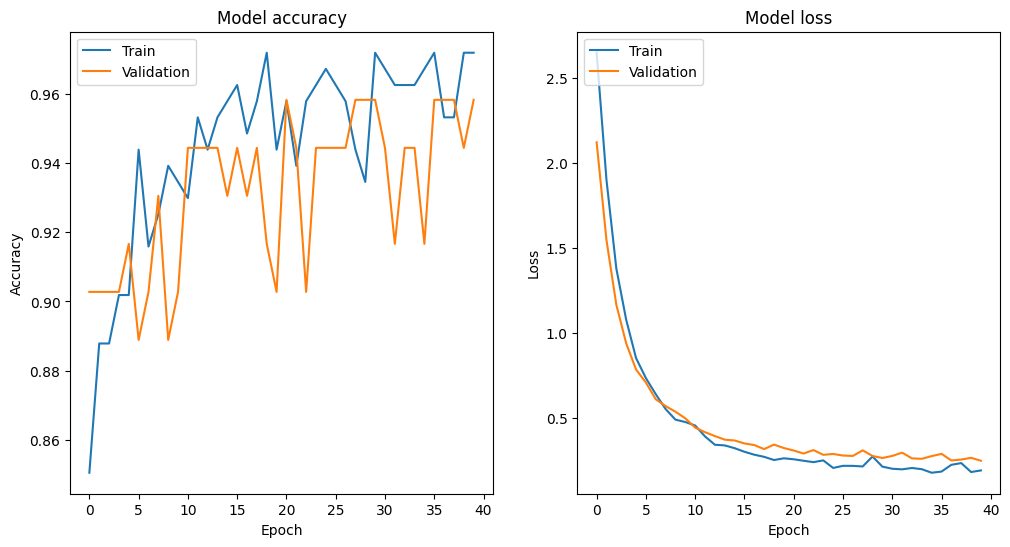

In [102]:
#start training the CNN model   
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Convert the spectrograms to NumPy arrays and reshape them to be compatible with the CNN input
X = np.array([spec.reshape(spec.shape[0], spec.shape[1], 1) for spec in spectrogram_df['spectrogram']])
y = np.array(spectrogram_df['label'])


# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(height, width)

# Reshape the data to be in the format (samples, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], height, width, 1)
X_test = X_test.reshape(X_test.shape[0], height, width, 1)

# Create the CNN model
reg_strength = 0.01

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:], kernel_regularizer=l2(reg_strength)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(reg_strength)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:], kernel_regularizer=l2(reg_strength)))
# model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(reg_strength)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.25, epochs=40, batch_size=16, callbacks=[early_stopping])
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=16)


# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [251]:
from kerastuner.tuners import RandomSearch

from keras.callbacks import Callback

class HistoryPerTrial(Callback):
    def __init__(self, trial_histories):
        super().__init__()
        self.trial_histories = trial_histories

    def on_train_end(self, logs=None):
        self.trial_histories.append(self.model.history.history)

input_shape = X_train.shape[1:]
num_classes = 2

hypermodel = CNNHyperModel(input_shape, num_classes)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='random_search',
    project_name='cnn_spectrogram'
)

tuner.search_space_summary()

trial_histories = []

tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[EarlyStopping(patience=3), HistoryPerTrial(trial_histories)])

tuner.results_summary()




best_model = tuner.get_best_models(num_models=1)[0]
score = best_model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Trial 20 Complete [00h 00m 09s]
val_accuracy: 0.3333333432674408

Best val_accuracy So Far: 0.9333333373069763
Total elapsed time: 00h 04m 16s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in random_search\cnn_spectrogram
Showing 10 best trials
Trial summary
Hyperparameters:
filters_1: 64
kernel_size_1: 5
num_layers: 1
filters_2: 96
kernel_size_2: 5
units: 256
dropout: 0.2
learning_rate: 0.00040466898500976094
filters_3: 96
kernel_size_3: 3
filters_4: 128
kernel_size_4: 3
filters_5: 96
kernel_size_5: 3
Score: 0.9333333373069763
Trial summary
Hyperparameters:
filters_1: 128
kernel_size_1: 5
num_layers: 1
filters_2: 64
kernel_size_2: 5
units: 160
dropout: 0.1
learning_rate: 0.001527760173151567
filters_3: 96
kernel_size_3: 5
filters_4: 32
kernel_size_4: 5
filters_5: 32
kernel_size_5: 3
Score: 0.9333333373069763
Trial summary
Hyperparameters:
filters_1: 128
kernel_size_1: 3
num_layers: 2
filters_2: 32
kernel_size_2: 5
units: 256
dropout: 0.4
learning_rate: 0.00087888157844

In [252]:
# Get the best trial index
best_trial_index = tuner.oracle.get_best_trials(num_trials=1)[0].trial_id

# Get the training history of the best trial
best_history = trial_histories[best_trial_index]

# Extract loss and accuracy data for training and validation
train_loss = best_history["loss"]
val_loss = best_history["val_loss"]
train_accuracy = best_history["accuracy"]
val_accuracy = best_history["val_accuracy"]

# Plot training and validation loss
plt.figure()
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot training and validation accuracy
plt.figure()
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

c:\Users\princ\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


AttributeError: 'Trial' object has no attribute 'history'